In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

C:\Users\azozroot\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

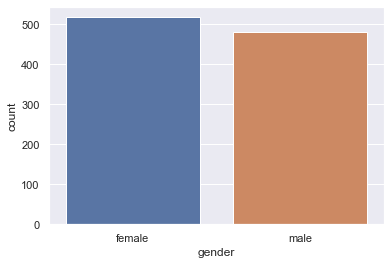

In [8]:
sns.countplot('gender',data=df)

In [9]:
df.sample(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
673,female,group C,associate's degree,standard,completed,65,84,84
593,female,group E,high school,standard,none,74,76,73
560,female,group D,some college,standard,completed,74,75,79
775,female,group B,some high school,free/reduced,none,49,58,55


C:\Users\azozroot\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

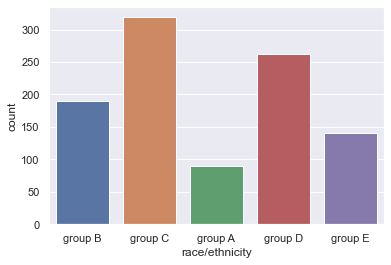

In [10]:
sns.countplot('race/ethnicity',data=df)

C:\Users\azozroot\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parental level of education', ylabel='count'>

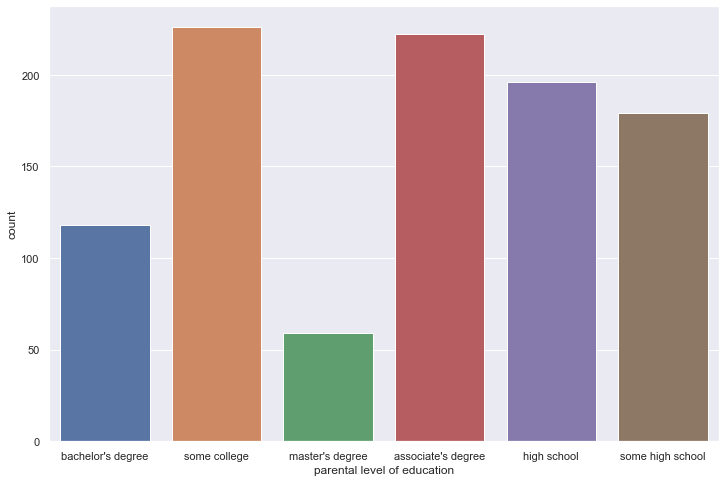

In [16]:
plt.figure(figsize=(12,8))
sns.countplot('parental level of education',data=df)

In [21]:
df[df['math score'] > 98].sort_values(by='math score',ascending=True).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90
306,male,group E,some college,standard,completed,99,87,81
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97


In [22]:
df[df['gender'] == 'male']['math score'].mean()

68.72821576763485

In [23]:
df.groupby('gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [24]:
new_df = df.apply(lambda x:x.factorize()[0]).corr()
new_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.057964,0.028383,-0.021372,0.006028,0.010944,-0.034410,-0.020345
race/ethnicity,0.057964,1.000000,-0.063602,-0.029391,0.007928,0.061043,0.016713,-0.003067
parental level of education,0.028383,-0.063602,1.000000,-0.014378,0.011558,-0.019032,0.048561,-0.019605
lunch,-0.021372,-0.029391,-0.014378,1.000000,0.017044,0.035912,0.009941,-0.033807
test preparation course,0.006028,0.007928,0.011558,0.017044,1.000000,0.027579,0.045530,0.041869
math score,0.010944,0.061043,-0.019032,0.035912,0.027579,1.000000,0.130386,0.153682
reading score,-0.034410,0.016713,0.048561,0.009941,0.045530,0.130386,1.000000,0.183561
writing score,-0.020345,-0.003067,-0.019605,-0.033807,0.041869,0.153682,0.183561,1.000000


<AxesSubplot:>

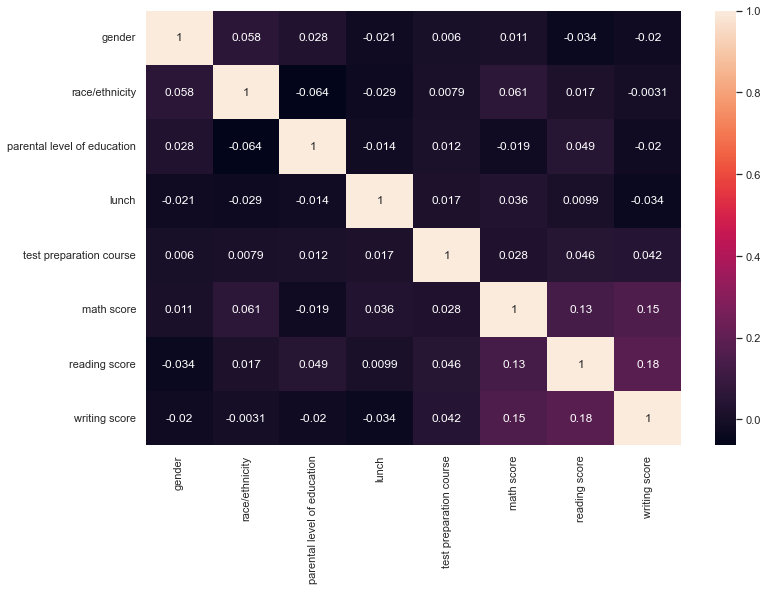

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(new_df,annot=True)